<a href="https://colab.research.google.com/github/swapniel99/erav1s9/blob/develop/S9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade torchinfo albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!git clone https://github.com/swapniel99/erav1s9.git
%cd erav1s9/
!git checkout develop
!git pull
%ls

fatal: destination path 'erav1s9' already exists and is not an empty directory.
/content/erav1s9
Already on 'develop'
Your branch is up to date with 'origin/develop'.
Already up to date.
assets/      datasets/  __pycache__/  requirements.txt  utils.py
backprop.py  model.py   README.md     S9.ipynb


In [3]:
from utils import *
set_seed(42)

Device Selected: cuda


In [4]:
from datasets import CIFAR10
from torchvision import transforms
batch_size = 32
cifar10 = CIFAR10(batch_size)

/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/transforms.py:1692: UserWarning: Using default interpolation INTER_NEAREST, which is sub-optimal.Please specify interpolation mode for downscale and upscale explicitly.For additional information see this PR https://github.com/albumentations-team/albumentations/pull/584
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified


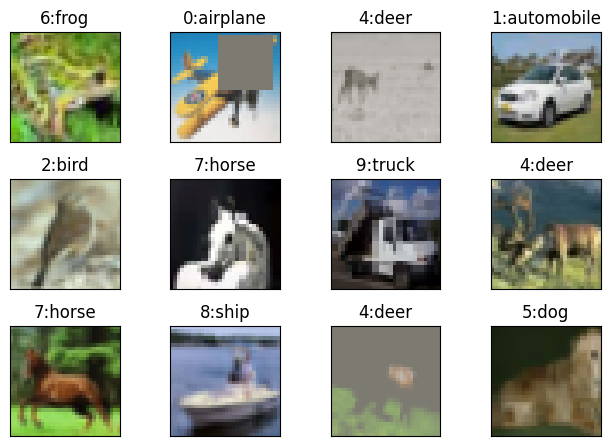

In [5]:
cifar10.show_examples()

In [6]:
from backprop import Experiment

In [7]:
from model import Model

In [8]:
model1 = Model(skip=True, dropout=0.01)
model1.summary(input_size=(batch_size, 3, 32, 32))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Model                                    [32, 3, 32, 32]           [32, 10]                  --                             --
├─Sequential: 1-1                        [32, 3, 32, 32]           [32, 25, 32, 32]          --                             --
│    └─ConvLayer: 2-1                    [32, 3, 32, 32]           [32, 25, 32, 32]          --                             --
│    │    └─Conv2d: 3-1                  [32, 3, 32, 32]           [32, 25, 32, 32]          675                         0.34%
│    │    └─BatchNorm2d: 3-2             [32, 25, 32, 32]          [32, 25, 32, 32]          50                          0.03%
│    │    └─ReLU: 3-3                    [32, 25, 32, 32]          [32, 25, 32, 32]          --                             --
│    │    └─Dropout: 3-4                 [32, 25, 32, 32]          [32, 25, 32, 32]          --                

In [9]:
exp1 = Experiment(model1, cifar10, lr=0.01)
exp1.execute(epochs=100, target=85)

Epoch 1


Train: Average Loss: 1.6472, Accuracy: 40.00: 100%|██████████| 1563/1563 [00:44<00:00, 34.81it/s]


Test:  Average loss: 1.2085, Accuracy: 56.27
Epoch 2


Train: Average Loss: 1.2988, Accuracy: 53.66: 100%|██████████| 1563/1563 [00:43<00:00, 36.30it/s]


Test:  Average loss: 0.9630, Accuracy: 65.98
Epoch 3


Train: Average Loss: 1.1557, Accuracy: 58.97: 100%|██████████| 1563/1563 [00:43<00:00, 35.74it/s]


Test:  Average loss: 0.8681, Accuracy: 69.71
Epoch 4


Train: Average Loss: 1.0629, Accuracy: 62.39: 100%|██████████| 1563/1563 [00:43<00:00, 36.30it/s]


Test:  Average loss: 0.7961, Accuracy: 71.77
Epoch 5


Train: Average Loss: 1.0005, Accuracy: 64.92: 100%|██████████| 1563/1563 [00:43<00:00, 35.63it/s]


Test:  Average loss: 0.7490, Accuracy: 73.61
Epoch 6


Train: Average Loss: 0.9499, Accuracy: 66.60: 100%|██████████| 1563/1563 [00:42<00:00, 37.00it/s]


Test:  Average loss: 0.6870, Accuracy: 75.79
Epoch 7


Train: Average Loss: 0.9169, Accuracy: 67.72: 100%|██████████| 1563/1563 [00:42<00:00, 36.72it/s]


Test:  Average loss: 0.6725, Accuracy: 77.00
Epoch 8


Train: Average Loss: 0.8848, Accuracy: 68.69: 100%|██████████| 1563/1563 [00:42<00:00, 36.51it/s]


Test:  Average loss: 0.6257, Accuracy: 78.16
Epoch 9


Train: Average Loss: 0.8662, Accuracy: 69.60: 100%|██████████| 1563/1563 [00:42<00:00, 36.81it/s]


Test:  Average loss: 0.6138, Accuracy: 78.60
Epoch 10


Train: Average Loss: 0.8400, Accuracy: 70.49: 100%|██████████| 1563/1563 [00:43<00:00, 35.66it/s]


Test:  Average loss: 0.6061, Accuracy: 78.78
Epoch 11


Train: Average Loss: 0.8231, Accuracy: 71.07: 100%|██████████| 1563/1563 [00:42<00:00, 36.67it/s]


Test:  Average loss: 0.5723, Accuracy: 80.13
Epoch 12


Train: Average Loss: 0.7981, Accuracy: 72.15: 100%|██████████| 1563/1563 [00:42<00:00, 36.50it/s]


Test:  Average loss: 0.5614, Accuracy: 80.51
Epoch 13


Train: Average Loss: 0.7874, Accuracy: 72.46: 100%|██████████| 1563/1563 [00:42<00:00, 36.37it/s]


Test:  Average loss: 0.5710, Accuracy: 80.42
Epoch 14


Train: Average Loss: 0.7691, Accuracy: 72.93: 100%|██████████| 1563/1563 [00:44<00:00, 35.19it/s]


Test:  Average loss: 0.5611, Accuracy: 80.56
Epoch 15


Train: Average Loss: 0.7578, Accuracy: 73.65: 100%|██████████| 1563/1563 [00:43<00:00, 36.26it/s]


Test:  Average loss: 0.5417, Accuracy: 81.51
Epoch 16


Train: Average Loss: 0.7439, Accuracy: 74.05: 100%|██████████| 1563/1563 [00:43<00:00, 36.25it/s]


Test:  Average loss: 0.5280, Accuracy: 82.11
Epoch 17


Train: Average Loss: 0.7337, Accuracy: 74.43: 100%|██████████| 1563/1563 [00:43<00:00, 36.26it/s]


Test:  Average loss: 0.5296, Accuracy: 81.49
Epoch 18


Train: Average Loss: 0.7277, Accuracy: 74.36: 100%|██████████| 1563/1563 [00:43<00:00, 36.32it/s]


Test:  Average loss: 0.5351, Accuracy: 81.49
Epoch 00018: reducing learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Average Loss: 0.6751, Accuracy: 76.50: 100%|██████████| 1563/1563 [00:44<00:00, 35.10it/s]


Test:  Average loss: 0.4668, Accuracy: 84.14
Epoch 20


Train: Average Loss: 0.6573, Accuracy: 77.21: 100%|██████████| 1563/1563 [00:43<00:00, 36.25it/s]


Test:  Average loss: 0.4687, Accuracy: 84.16
Epoch 21


Train: Average Loss: 0.6484, Accuracy: 77.44: 100%|██████████| 1563/1563 [00:43<00:00, 36.21it/s]


Test:  Average loss: 0.4560, Accuracy: 84.70
Epoch 22


Train: Average Loss: 0.6463, Accuracy: 77.56: 100%|██████████| 1563/1563 [00:43<00:00, 36.23it/s]


Test:  Average loss: 0.4656, Accuracy: 84.46
Epoch 23


Train: Average Loss: 0.6381, Accuracy: 77.89: 100%|██████████| 1563/1563 [00:44<00:00, 35.17it/s]


Test:  Average loss: 0.4531, Accuracy: 84.55
Epoch 24


Train: Average Loss: 0.6383, Accuracy: 77.65: 100%|██████████| 1563/1563 [00:43<00:00, 36.08it/s]


Test:  Average loss: 0.4516, Accuracy: 84.55
Epoch 25


Train: Average Loss: 0.6338, Accuracy: 77.91: 100%|██████████| 1563/1563 [00:43<00:00, 36.09it/s]


Test:  Average loss: 0.4523, Accuracy: 84.79
Epoch 26


Train: Average Loss: 0.6276, Accuracy: 78.29: 100%|██████████| 1563/1563 [00:43<00:00, 36.26it/s]


Test:  Average loss: 0.4465, Accuracy: 85.03
Epoch 27


Train: Average Loss: 0.6295, Accuracy: 78.28: 100%|██████████| 1563/1563 [00:43<00:00, 36.07it/s]


Test:  Average loss: 0.4445, Accuracy: 84.91
Epoch 28


Train: Average Loss: 0.6295, Accuracy: 78.00: 100%|██████████| 1563/1563 [00:44<00:00, 35.46it/s]


Test:  Average loss: 0.4447, Accuracy: 84.89
Epoch 29


Train: Average Loss: 0.6245, Accuracy: 78.34: 100%|██████████| 1563/1563 [00:42<00:00, 36.43it/s]


Test:  Average loss: 0.4440, Accuracy: 85.09
Epoch 30


Train: Average Loss: 0.6196, Accuracy: 78.20: 100%|██████████| 1563/1563 [00:43<00:00, 35.96it/s]


Test:  Average loss: 0.4470, Accuracy: 85.25
Target Validation accuracy achieved thrice. Stopping Training.


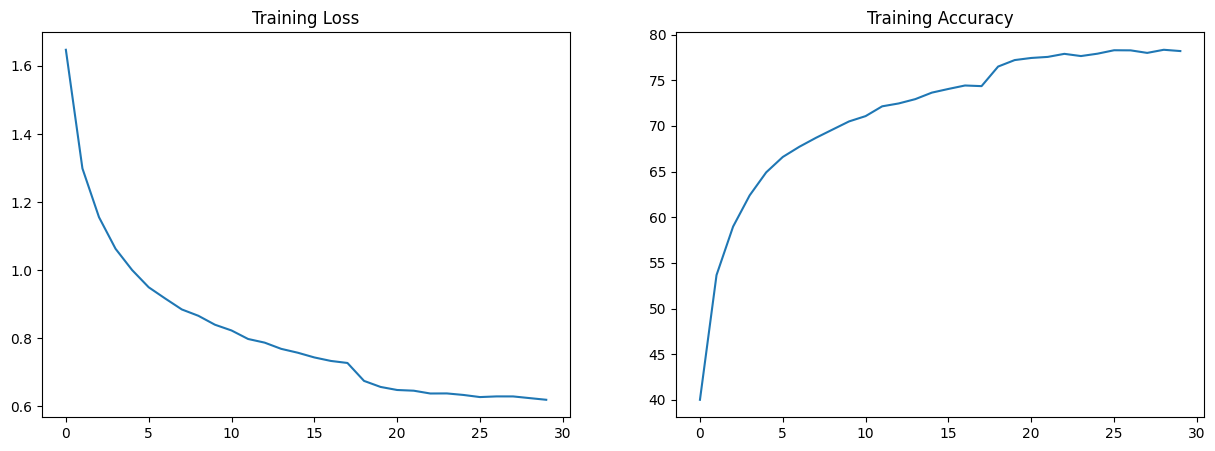

In [10]:
exp1.train.plot_stats()

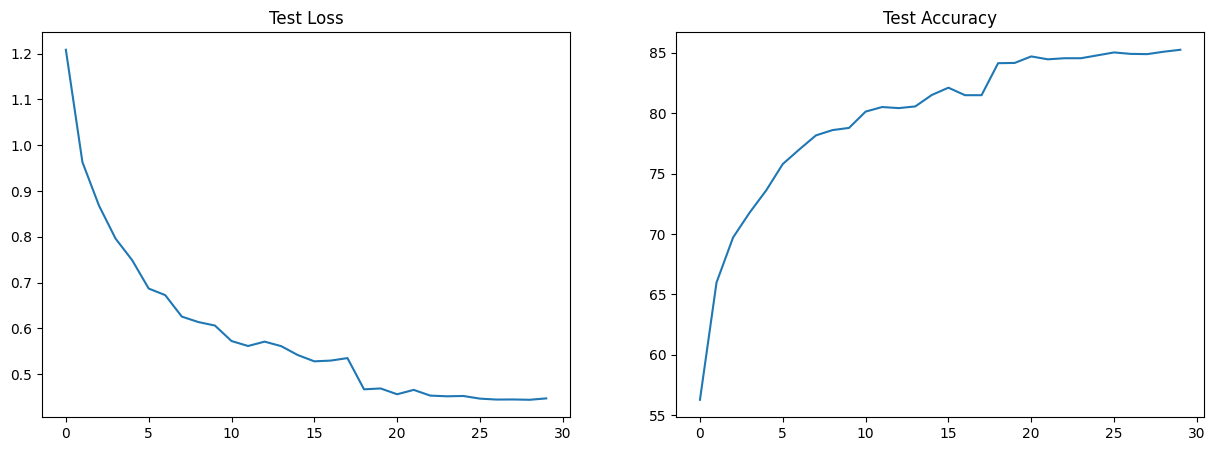

In [11]:
exp1.test.plot_stats()

Test:  Average loss: 0.4470, Accuracy: 85.25


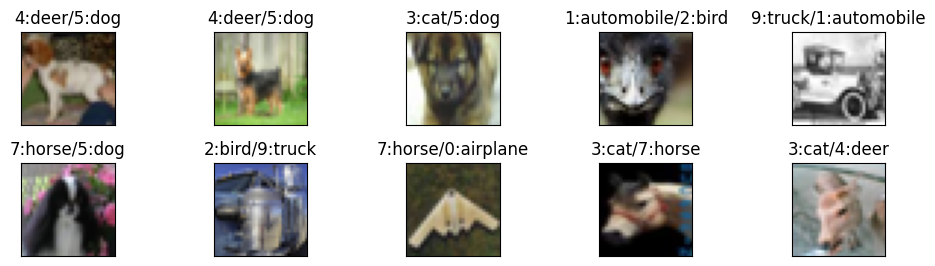

In [12]:
exp1.show_incorrect()